<h1>Flight Ticket Price Prediction - an end-to-end Project</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/naad/Documents/coding/VSCode-Projects/ML/Flight Ticket Price Prediction/Datasets/Clean_Dataset.csv")
# df

In [3]:
headers = list(df.columns)

**Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.**



**Time Frame - February 11th to March 31st, 2022.**

<h2>Fetching Unique Values for Relevant Features</h2>

In [4]:
for column in df.columns:
    if column != 'duration' and column != 'price' and column != 'days_left' and column != 'Unnamed: 0' and column != 'flight':
        print(f"{column}: \n{df[column].unique()}\n\n")

airline: 
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


source_city: 
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']


departure_time: 
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


stops: 
['zero' 'one' 'two_or_more']


arrival_time: 
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


destination_city: 
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


class: 
['Economy' 'Business']




<h2>Exploratory Data Analysis(EDA)</h2>

**1.  Does price vary with Airlines?**

<AxesSubplot:xlabel='airline', ylabel='price'>

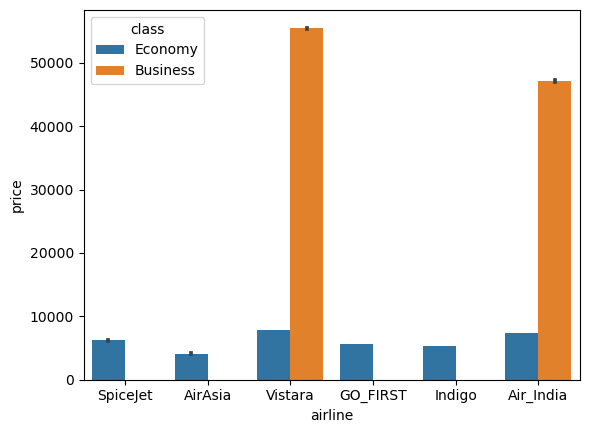

In [5]:
sns.barplot(data=df, x='airline', y='price', hue='class')

Therefore, Yes, Price varies with Airlines.
Clearly, in Economy Class Vistara is the most expensive and Air Asia is the least expensive whereas,
in the Business Class, Vistara is the most expensive and Air India is the least expensive

**2.  How is the price affected when tickets are bought in just 1 or 2 days before departure?**

<AxesSubplot:xlabel='days_left', ylabel='price'>

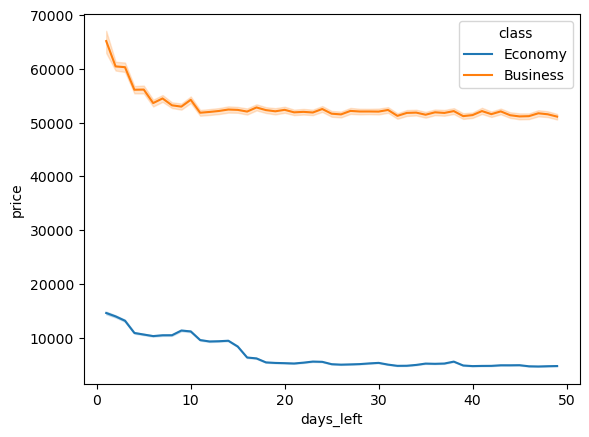

In [6]:
sns.lineplot(data=df, x='days_left', y='price', hue='class')

<AxesSubplot:xlabel='days_left', ylabel='price'>

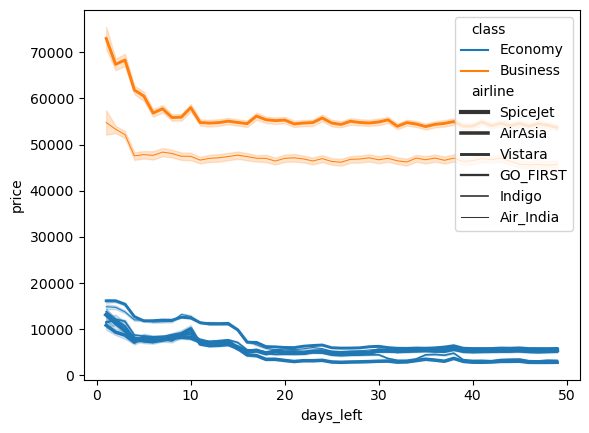

In [7]:
sns.lineplot(data=df, x='days_left', y='price', hue='class', size='airline')

Based on the data analysis, it is evident that the prices of airline tickets rise considerably when purchased just 1-2 days before the scheduled departure, with Business class tickets being subject to even higher price hikes compared to Economy class tickets.

Furthermore, the data reveals that the prices of tickets remain relatively stable for an extended period before experiencing a sudden increase of around 30-35% for Business class tickets on Vistara Airlines, and approximately 15% for Air_India.

To secure the most cost-effective tickets, it is recommended to purchase Economy class tickets at least three weeks prior to the departure date, while for Business class tickets, it is advisable to buy them at least ten days before the scheduled departure.

**3. Does ticket price change based on the departure time and arrival time?**

In [8]:
econ_df = df.loc[df['class'] == 'Economy']
business_df = df.loc[df['class'] == 'Business']

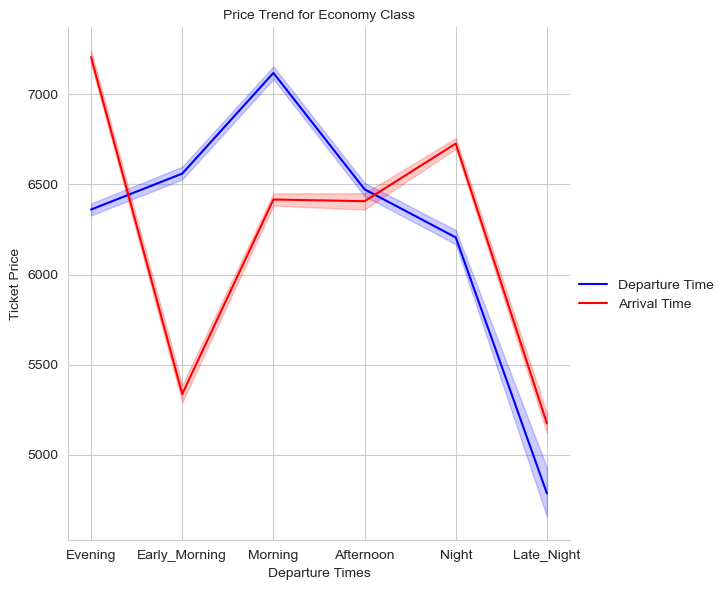

In [138]:
grid = sns.FacetGrid(econ_df, col="class", height=6)
grid.map(sns.lineplot, 'departure_time', 'price', color='blue', label='Departure Time')
grid.map(sns.lineplot, 'arrival_time', 'price', color='red', label='Arrival Time')
grid.set_axis_labels("Departure Times", "Ticket Price")
grid.add_legend()
grid.set_titles("Price Trend for Economy Class")

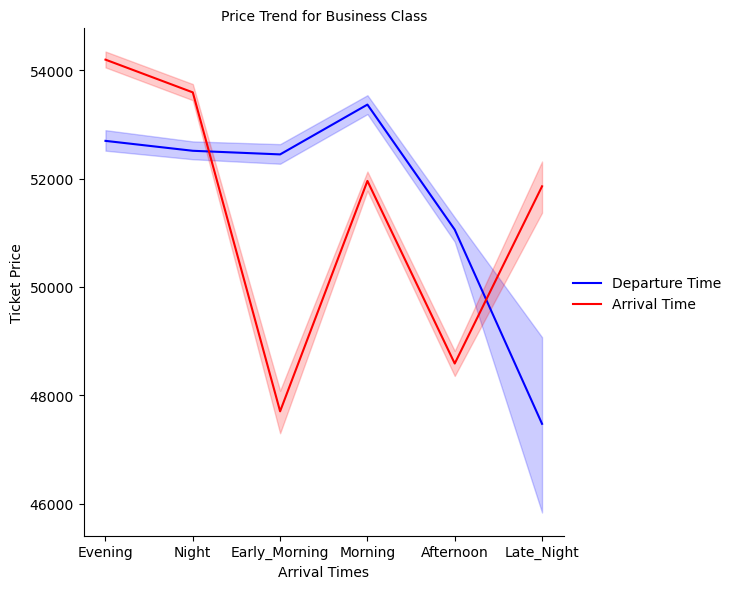

In [10]:
grid = sns.FacetGrid(business_df, col="class", height=6)
grid.map(sns.lineplot, 'departure_time', 'price', color='blue', label='Departure Time')
grid.map(sns.lineplot, 'arrival_time', 'price', color='red', label='Arrival Time')
grid.set_axis_labels("Arrival Times", "Ticket Price")
grid.add_legend()
grid.set_titles("Price Trend for Business Class")

In the first grid, the departure time line plot is shown in blue and the arrival time line plot is shown in red. The x-axis represents the departure or arrival times, and the y-axis represents the ticket price. It is evident that the price tends to be higher for the Economy class when the departure time is in the morning, and it decreases as the day progresses, hitting a low in the evening before increasing again at night. Similarly, the price tends to be higher when the arrival time is in the afternoon or evening, with lower prices in the morning or at night.

In the second grid, the arrival time line plot is shown in blue, and the departure time line plot is shown in red. The x-axis represents the arrival time, and the y-axis represents the ticket price. The trend for the Business class is slightly different than that of the Economy class, with the ticket price tending to be highest in the afternoon and evening, and lower in the morning or at night.

**4. How the price changes with change in Source and Destination?**

In [11]:
result_df = pd.DataFrame(columns=['city', 'p_class', 'mean_ticket_price'])

for city in df.source_city.unique():
    for p_class in df['class'].unique():
        mean_ticket_price = df.loc[(df['source_city'] == city) & (df['class'] == p_class)].price.mean()
        result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
                                     ignore_index=True)

# result_df

/var/folders/vh/5wf7cf4x0gs_z_1y_mjk7yy40000gn/T/ipykernel_59654/502844176.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
/var/folders/vh/5wf7cf4x0gs_z_1y_mjk7yy40000gn/T/ipykernel_59654/502844176.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
/var/folders/vh/5wf7cf4x0gs_z_1y_mjk7yy40000gn/T/ipykernel_59654/502844176.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
/var/folders/vh/5wf7cf4x0gs_z_1y_mjk7

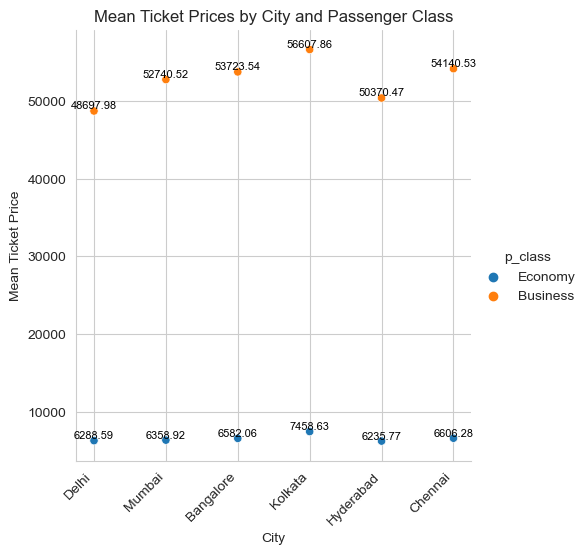

In [12]:
sns.set_style('whitegrid')
g = sns.relplot(data=result_df, x='city', y='mean_ticket_price', hue='p_class')
for _, row in result_df.iterrows():
    g.ax.text(row['city'], row['mean_ticket_price'], f'{row["mean_ticket_price"]:.2f}',
              color='black', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.title('Mean Ticket Prices by City and Passenger Class')
plt.xlabel('City')
plt.ylabel('Mean Ticket Price')
plt.show()

In [13]:
# sns.set_style('whitegrid')
# g = sns.catplot(data=df, x='source_city', y='price', hue='class', kind='box')
# g.fig.set_size_inches(10, 6)
# g.ax.set_title('Ticket Prices by City and Passenger Class')
# g.ax.set_xlabel('City')
# g.ax.set_ylabel('Ticket Price')
# plt.show()

# BOXPLOT

In [14]:
# sns.set_style('whitegrid')
# g = sns.heatmap(data=result_df.pivot('city', 'p_class', 'mean_ticket_price'), cmap='RdYlBu_r', annot=True, fmt='.2f')
# g.set_title('Mean Ticket Prices by City and Passenger Class')
# g.set_xlabel('Passenger Class')
# g.set_ylabel('City')
# plt.show()

# # HEATMAP

In [15]:
result_df = pd.DataFrame(columns=['city', 'p_class', 'mean_ticket_price'])

for city in df.destination_city.unique():
    for p_class in df['class'].unique():
        mean_ticket_price = df.loc[(df['source_city'] == city) & (df['class'] == p_class)].price.mean()
        result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
                                     ignore_index=True)

# result_df

/var/folders/vh/5wf7cf4x0gs_z_1y_mjk7yy40000gn/T/ipykernel_59654/1847308714.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
/var/folders/vh/5wf7cf4x0gs_z_1y_mjk7yy40000gn/T/ipykernel_59654/1847308714.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
/var/folders/vh/5wf7cf4x0gs_z_1y_mjk7yy40000gn/T/ipykernel_59654/1847308714.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'city': city, 'p_class': p_class, 'mean_ticket_price': mean_ticket_price},
/var/folders/vh/5wf7cf4x0gs_z_1y_m

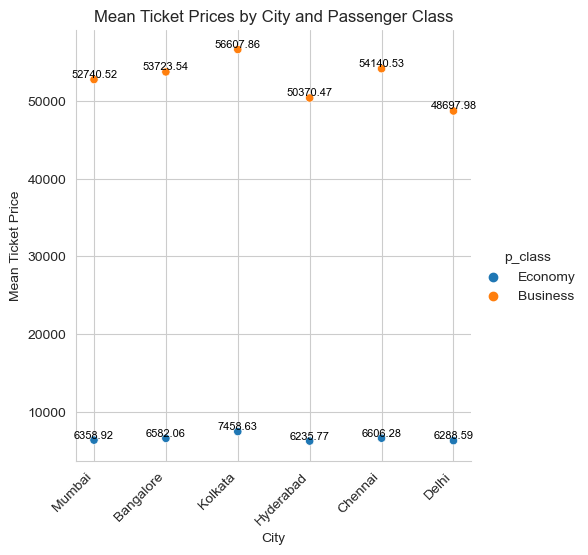

In [16]:
sns.set_style('whitegrid')
g = sns.relplot(data=result_df, x='city', y='mean_ticket_price', hue='p_class')
for _, row in result_df.iterrows():
    g.ax.text(row['city'], row['mean_ticket_price'], f'{row["mean_ticket_price"]:.2f}',
              color='black', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45, ha='right')
plt.title('Mean Ticket Prices by City and Passenger Class')
plt.xlabel('City')
plt.ylabel('Mean Ticket Price')
plt.show()

In [17]:
df["Route"] = df.source_city + '-' + df.destination_city

In [18]:
e_route_df = df.groupby('Route').apply(lambda df: df.loc[df['class'] == 'Economy'].price.mean()).sort_values(ascending=False)
b_route_df = df.groupby('Route').apply(lambda df: df.loc[df['class'] == 'Business'].price.mean()).sort_values(ascending=False)

Text(0.5, 0, 'Ticket Price')

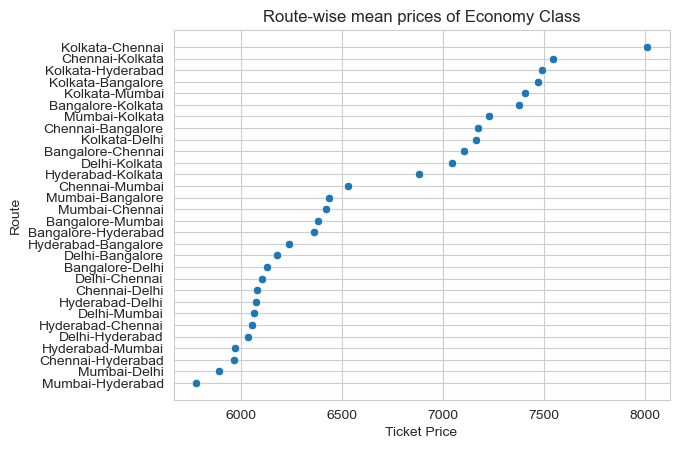

In [19]:
sns.set_style('whitegrid')
g = sns.scatterplot(data=e_route_df, y='Route', x=e_route_df.values)
g.set_title("Route-wise mean prices of Economy Class")
g.set_xlabel("Ticket Price")

Text(0.5, 0, 'Ticket Price')

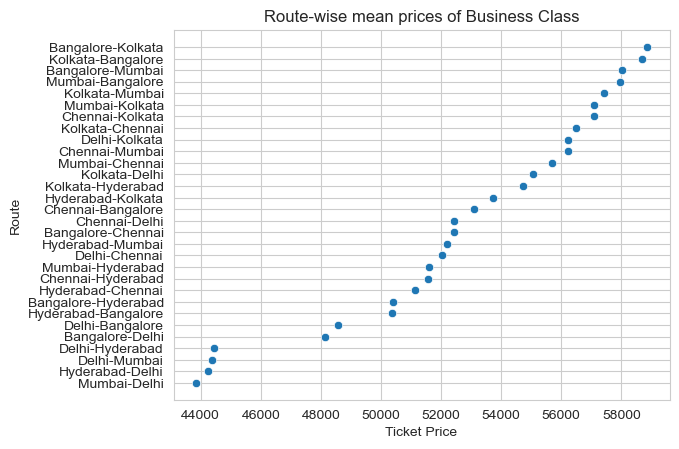

In [20]:
sns.set_style('whitegrid')
g = sns.scatterplot(data=b_route_df, y='Route', x=b_route_df.values)
g.set_title("Route-wise mean prices of Business Class")
g.set_xlabel("Ticket Price")

The data shows that flights departing from Delhi have the least expensive tickets, followed by Hyderabad, Mumbai, Bangalore, Chennai, and Kolkata, where tickets are the most expensive for departing flights. Similarly, tickets for flights arriving in Delhi are the least expensive, followed by Hyderabad, Mumbai, Bangalore, Chennai, and Kolkata, where tickets for arriving flights are the most expensive.

Regarding average ticket prices for specific routes, Chennai-Kolkata and Kolkata-Chennai have the most expensive economy tickets on average, while business class tickets for Bangalore-Kolkata and Kolkata-Bangalore are the most expensive. This is interesting because it does not make geographical sense and is likely due to logistical reasons.

For economy class, Mumbai-Hyderabad is the cheapest route, followed by Mumbai-Delhi and Chennai-Hyderabad. For business class, Mumbai-Delhi is the cheapest route, followed by Hyderabad-Delhi and Delhi-Mumbai.

**5. How does the ticket price vary between Economy and Business class?**

In [21]:
class_df = df.groupby('class').apply(lambda df: df.price.mean())
class_df = class_df.to_frame().reset_index()
class_df.dtypes

class     object
0        float64
dtype: object

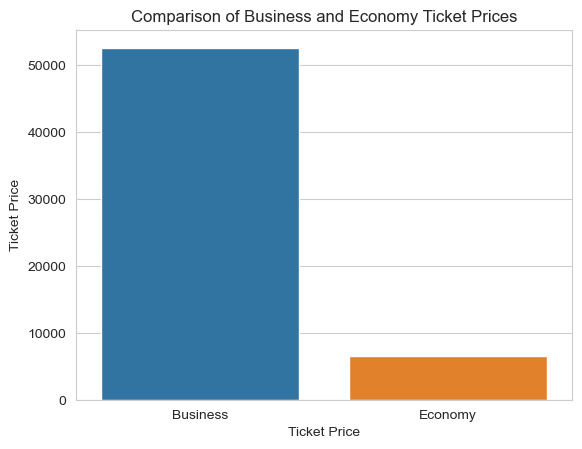

In [22]:
sns.barplot(data=class_df, x='class', y=0)
plt.xlabel('Ticket Price')
plt.title('Comparison of Business and Economy Ticket Prices')
plt.ylabel("Ticket Price")
plt.show()

In [23]:
# print(df.loc[df['class'] == 'Economy'].price.idxmax())
# print(df.loc[df['class'] == 'Business'].price.idxmin())

In [24]:
# print(df.iloc[197809])
# print('\n')
# print(df.iloc[256066])

It is a well-known fact that Business Class tickets are generally more expensive than Economy Class tickets. This is due to the additional amenities and perks that come with Business Class, such as more legroom, better food, and priority boarding.

However, it is interesting to note that there are certain exceptions to this general rule. For instance, the most expensive Economy Class ticket from Chennai to Kolkata is priced at a whopping 42349Rs, which is higher than some Business Class tickets for other routes.

On the other hand, the cheapest Business Class ticket for the route from Bangalore to Hyderabad is only priced at 12000Rs, which is significantly lower than the average Business Class ticket price. This phenomenon can be attributed to logistical and market factors, such as competition among airlines and demand for certain routes.

Another Fun Fact: Air India appears to offer both the most expensive economy class ticket and the least expensive business class ticket.It's not uncommon for airlines to have some variability in their pricing, and it's possible that Air India's pricing strategy includes offering both high-priced economy tickets and low-priced business tickets.
There could be several reasons for this pricing strategy. For example, Air India may be trying to attract more customers to its business class seats by offering them at a lower price point. At the same time, the airline may be looking to maximize revenue by charging a premium for its most expensive economy tickets.
It's also possible that these pricing variations are a result of supply and demand factors, such as the availability of seats on particular flights or the popularity of certain routes.
Overall, it's difficult to say for certain why Air India is offering both high-priced economy tickets and low-priced business tickets without more information about their pricing strategy and market factors.

Overall, while the price difference between Business and Economy Class tickets may be a general trend, there can be notable exceptions that are worth exploring and understanding in the context of the airline industry.

**6. Does Flight Duration Affect the Ticket Prices?**

In [25]:
model_df = df.copy()
model_df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Route
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai-Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai-Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai-Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai-Hyderabad


In [26]:
bins = np.linspace(start=df.duration.min(), stop=df.duration.max(), num=4)
labels = ['short', 'moderate', 'long']
df.duration = pd.cut(df.duration, bins=bins, labels=labels, include_lowest=True)
df.duration.value_counts()

short       234296
moderate     64964
long           893
Name: duration, dtype: int64

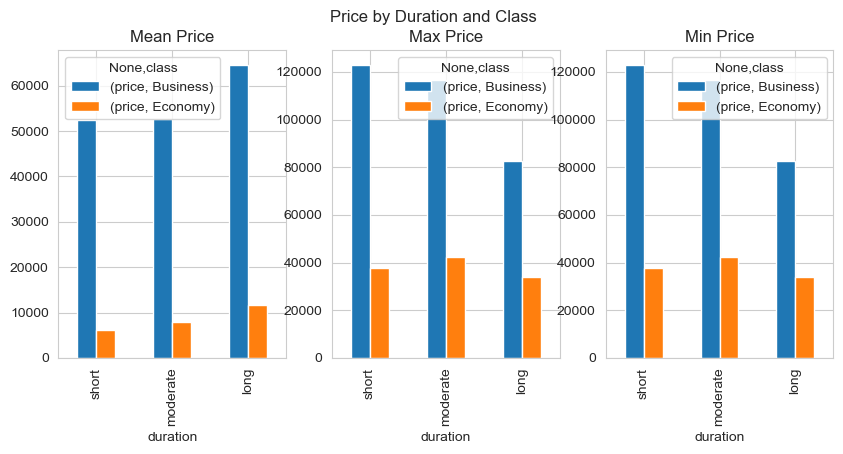

In [27]:
mean_duration = df.groupby(["duration", 'class']).price.mean().to_frame()
max_duration = df.groupby(["duration", 'class']).price.max().to_frame()
min_duration = df.groupby(["duration", 'class']).price.max().to_frame()

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
mean_duration.unstack().plot(kind='bar', ax=axs[0], title='Mean Price')
max_duration.unstack().plot(kind='bar', ax=axs[1], title='Max Price')
min_duration.unstack().plot(kind='bar', ax=axs[2], title='Min Price')
plt.suptitle('Price by Duration and Class')
plt.show()

According to the data, 

**7. How does the number of stops affect flight prices**

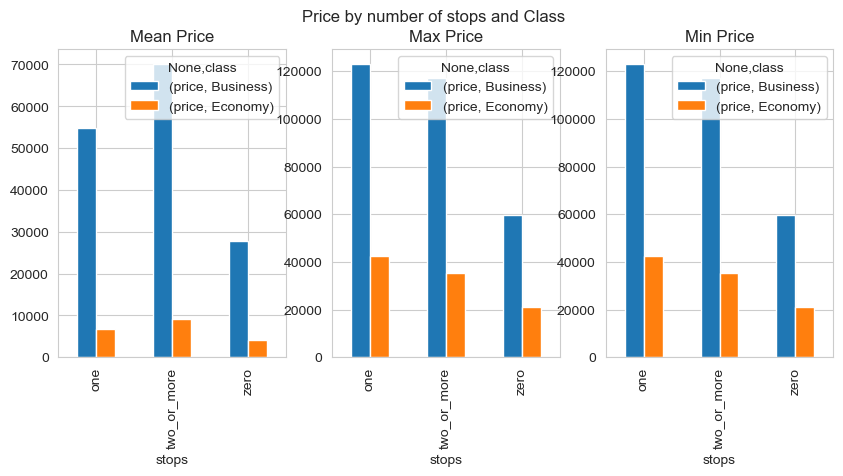

In [28]:
mean_stops = df.groupby(["stops", 'class']).price.mean().to_frame()
max_stops = df.groupby(["stops", 'class']).price.max().to_frame()
min_stops = df.groupby(["stops", 'class']).price.max().to_frame()

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
mean_stops.unstack().plot(kind='bar', ax=axs[0], title='Mean Price')
max_stops.unstack().plot(kind='bar', ax=axs[1], title='Max Price')
min_stops.unstack().plot(kind='bar', ax=axs[2], title='Min Price')
plt.suptitle('Price by number of stops and Class')
plt.show()

<h1>Conclusion</h1>

<h3>If you're someone who is looking to save money on flight tickets, there are several factors to consider before making your purchase. One of the most important factors is the timing of your flights. It's worth noting that the time of day and the day of the week can have a significant impact on the price of a ticket. In general, flights that depart and arrive at late-night times tend to be cheaper than those that depart and arrive during peak hours.**

For flights that have a 0-stop journey time of 2-3 hours, late-night departure and arrival times are often a viable option. These flights typically depart after 9 or 10 pm and arrive at the destination in the early hours of the morning. While these flights may not be the most convenient in terms of scheduling, they can be a great way to save money on your ticket.

Another factor to consider when booking your flight is the number of stops it takes. In some cases, a flight with more stops may be cheaper than one with fewer stops, depending on the route and the airline. It's worth doing some research to find out which airlines offer the best deals for your chosen route and how many stops they typically make.

When it comes to finding the best deal on flight tickets, it's important to be flexible and open to different options. By considering factors such as timing, number of stops, and airline options, you can increase your chances of finding a great deal on your next flight.</h3>

<h1>Feature Engineering</h1>

In [30]:
df = model_df
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Route
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi-Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi-Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi-Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi-Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi-Mumbai


Target Encoding all variables

In [31]:
# %pip install category_encoders

In [39]:
import category_encoders as ce

te = ce.TargetEncoder(cols=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'])
df = te.fit_transform(df, df['price'])


In [43]:
df = df.drop(['Unnamed: 0','flight', 'Route'], axis=1)

Scaling Data

In [44]:
from sklearn.preprocessing import MinMaxScaler

names = df.columns
indexes = df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(df)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.079383,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.079383,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000000,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,1.000000,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,1.000000,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


In [45]:
from sklearn.model_selection import train_test_split

X = data_scaled.drop('price', axis=1)
y = data_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

<h1>Prediction Models</h1>

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

 <ol>  
    <ls><h1>1. Random Forest - 98.5486%</h1></ls>
    <ls><h3>96.487%: max_depth=10</h3></ls>
    <ls><h3>97.224%: max_depth=12</h3></ls>
    <ls><h3>97.837%: max_depth=14</h3></ls>
    <ls><h3>98.251%: max_depth=16</h3></ls>
    <ls><h3>98.460%: max_depth=18</h3></ls>
    <ls><h3>98.537%: max_depth=20</h3></ls>
    <ls><h2>98.543%: <u><i>max_depth=21</i></u></h2></ls>
        <ul>
            <ls><h4>&emsp;&emsp;&emsp;98.544%: n_estimators=120</h4></ls>
            <ls><h4>&emsp;&emsp;&emsp;98.5447%: n_estimators=150</h4></ls>
            <ls><h4>&emsp;&emsp;&emsp;98.5476%: n_estimators=200</h4></ls>
            <ls><h2>&emsp;&emsp;&emsp;<i><u>98.5486%: n_estimators=300</u></i></h2></ls>
            <ls><h4>&emsp;&emsp;&emsp;98.5483%: n_estimators=500</h4></ls>
            <ls><h4>&emsp;&emsp;&emsp;98.5486%: n_estimators=1000</h4></ls>
        </ul>
    <ls><h3>98.5457%: max_depth=22</h3></ls>
        <ul>
            <ls><h4>&emsp;&emsp;&emsp;98.5471%: n_estimators=300</h4></ls>
        </ul>
    <ls><h3>98.533%: max_depth=23</h3></ls>
    <ls><h3>98.525%: max_depth=24</h3></ls>
</ol>

In [183]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=22, random_state=42, n_estimators=300)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=22, n_estimators=300, random_state=42)

In [184]:
y_pred = regr.predict(X_test)

regr_score = regr.score(X_test, y_test)
regr_mae = mean_absolute_error(y_test, y_pred)
regr_r2 = r2_score(y_test, y_pred)

print("Accuracy: ", regr_score)
print("Mean Absolute Error: ", regr_mae)
print("R-squared:", regr_r2)

Accuracy:  0.9854706348976982
Mean Absolute Error:  0.009315667034111989
R-squared: 0.9854706348976982


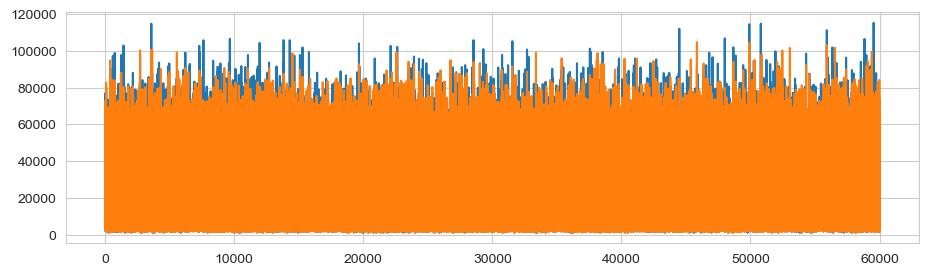

In [186]:
d = pd.DataFrame(np.concatenate((X_test, y_pred.reshape(-1, 1)), axis=1))
d = sc.inverse_transform(d)
d = pd.DataFrame(d)

d0 = pd.DataFrame(np.concatenate((X_test, y_test.values.reshape(-1, 1)), axis=1))
d0 = sc.inverse_transform(d0)
d0 = pd.DataFrame(d0)

result = pd.concat([d0.iloc[:, 9], d.iloc[:, 9]], axis=1)
result.columns = ['true', 'pred']
plt.figure(figsize=(11,3))
plt.plot(result['true'])
plt.plot(result['pred'])

<h2>2. Multiple Polynomial Regression</h2>
<h3>93.801% @ degree=2 -> 0.64s</h3>
<h3>94.765% @ degree=3 -> 1.924s</h3>
<h3>95.247% @ degree=4 -> 14s</h3>
<h3><u>95.744% @ degree=5 -> 193s(3.22min)</u></h3>
<h3>94.839% @ degree=6 -> 2260s(37.67min)</h3>

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from time import perf_counter

start = perf_counter()
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

lin_regr_poly = LinearRegression()
lin_regr_poly.fit(X_train_poly, y_train)
end = perf_counter()
time = (end-start)
print(str(time) + 's')

1.924217624999983s


In [146]:
y_pred_lpr = lin_regr_poly.predict(X_test_poly)

lregr_score = lin_regr_poly.score(X_test_poly, y_test)
lregr_mae = mean_absolute_error(y_test, y_pred_lpr)
lregr_r2 = r2_score(y_test, y_pred_lpr)

print("Accuracy Score: ", lregr_score)
print("Mean Absolute Error: ", lregr_mae)
print("R-squared:", lregr_r2)

Accuracy Score:  0.9476538729647872
Mean Absolute Error:  0.025591294290681375
R-squared: 0.9476538729647872


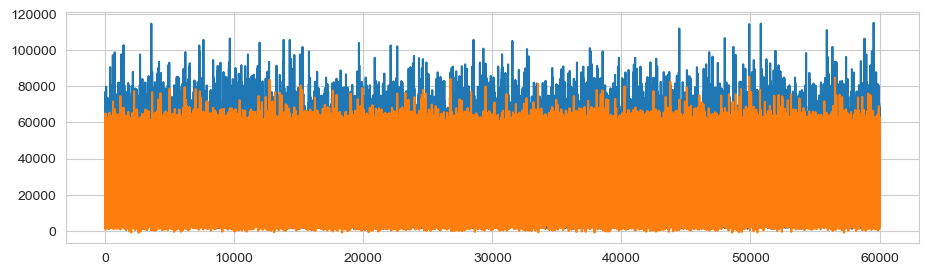

In [147]:
d = pd.DataFrame(np.concatenate((X_test, y_pred_lpr.reshape(-1, 1)), axis=1))
d = sc.inverse_transform(d)
d = pd.DataFrame(d)

d0 = pd.DataFrame(np.concatenate((X_test, y_test.values.reshape(-1, 1)), axis=1))
d0 = sc.inverse_transform(d0)
d0 = pd.DataFrame(d0)

result = pd.concat([d0.iloc[:, 9], d.iloc[:, 9]], axis=1)
result.columns = ['true', 'pred']
plt.figure(figsize=(11,3))
plt.plot(result['true'])
plt.plot(result['pred'])

<h2>3. Linear Regression - 90.21%</h2>

In [117]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred_lr = lin_reg.predict(X_test)

lin_reg_score = lin_reg.score(X_test, y_test)
lin_reg_mae = mean_absolute_error(y_test, y_pred_lr)
lin_reg_r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", lin_reg_score)
print("Mean Absolute Error: ", lin_reg_mae)
print("R-squared:", lin_reg_r2)

Mean Squared Error: 0.902090866012934
Mean Absolute Error:  0.03798559351764339
R-squared: 0.902090866012934


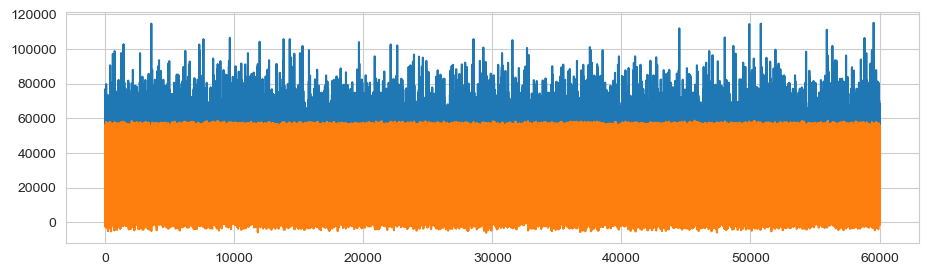

In [120]:
d = pd.DataFrame(np.concatenate((X_test, y_pred_lr.reshape(-1, 1)), axis=1))
d = sc.inverse_transform(d)
d = pd.DataFrame(d)

d0 = pd.DataFrame(np.concatenate((X_test, y_test.values.reshape(-1, 1)), axis=1))
d0 = sc.inverse_transform(d0)
d0 = pd.DataFrame(d0)

result = pd.concat([d0.iloc[:, 9], d.iloc[:, 9]], axis=1)
result.columns = ['true', 'pred']
plt.figure(figsize=(11,3))
plt.plot(result['true'])
plt.plot(result['pred'])


-----------------------------------------------------------------------------------MODELS------------------------------------------------------------------------------------
